In [128]:
import pandas as pd
import numpy as np

In [129]:
pd.set_option('display.max_columns', None)

In [130]:
nfl_data = pd.read_csv('cleaned_nfl_data(v2).csv')

In [131]:
nfl_data = nfl_data.drop('Unnamed: 0', axis = 1)

In [160]:
nfl_data

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner
0,2009091000,1,1,NaN,3600.0,TEN,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,39,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,0.323526,2.014474,0.485675,0.546433,0.060758,2009,0.0,0.0,False,True,PIT
1,2009091000,1,1,1.0,3593.0,PIT,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,5,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,2.338000,0.077907,0.546433,0.551088,0.004655,2009,0.0,0.0,False,True,PIT
2,2009091000,1,1,2.0,3556.0,PIT,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,-3,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,end,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,2.415907,-1.402760,0.551088,0.510793,-0.040295,2009,0.0,0.0,False,True,PIT
3,2009091000,1,1,3.0,3515.0,PIT,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,1.013147,-1.712583,0.510793,0.461217,-0.049576,2009,0.0,0.0,False,True,PIT
4,2009091000,1,1,4.0,3507.0,PIT,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,-0.699436,2.097796,0.461217,0.558929,0.097712,2009,0.0,0.0,False,True,PIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386269,2017123101,29,4,NaN,28.0,BAL,32.0,0,-4,0.0,0.0,NaN,NaN,Timeout #1 by BAL at 00:28.,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,NaN,NaN,BAL,CIN,0.000000,0.000000,NaN,NaN,0.000000,2017,27.0,30.0,True,True,CIN
386270,2017123101,29,4,3.0,28.0,BAL,77.0,14,-4,0.0,0.0,BAL,CIN,(:28) (Shotgun) J.Flacco pass incomplete short...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,J.Flacco,00-0026158,1,Incomplete Pass,Short,12,0,0,middle,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,27.0,30.0,BAL,CIN,0.200905,-0.340818,0.080409,0.050478,-0.029931,2017,27.0,30.0,True,True,CIN
386271,2017123101,29,4,4.0,24.0,BAL,77.0,14,9,0.0,1.0,BAL,CIN,(:24) (Shotgun) J.Flacco pass short middle to ...,13,0,NaN,NaN,NaN,0,0,NaN,Pass,J.Flacco,00-0026158,1,Complete,Short,10,3,0,middle,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,27.0,30.0,BAL,CIN,-0.139913,0.139913,0.050478,0.030881,-0.019597,2017,27.0,30.0,True,True,CIN
386272,2017123101,30,4,1.0,14.0,BAL,36.0,10,-1,0.0,0.0,CIN,BAL,(:14) A.Dalton kneels to BAL 37 for -1 yards.,-1,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,30.0,27.0,BAL,CIN,0.000000,0.000000,0.030881,0.000000,0.030881,2017,27.0,30.0,True,True,CIN


In [132]:
df_for_possession_viz = nfl_data[nfl_data['TimeSecs'] == 3600][['GameID','posteam', 'DefensiveTeam', 'Winner']]

In [133]:
df_for_possession_viz = df_for_possession_viz.drop_duplicates('GameID')

In [134]:
sum(df_for_possession_viz['posteam'] == df_for_possession_viz['Winner']) / len(df_for_possession_viz)

0.48828125

In [135]:
sum(df_for_possession_viz['DefensiveTeam'] == df_for_possession_viz['Winner']) / len(df_for_possession_viz)

0.5017361111111112

In [136]:
sum(df_for_possession_viz['Winner'] == 'TIE') / len(df_for_possession_viz)

0.008246527777777778

In [137]:
df_for_possession_viz = df_for_possession_viz.drop_duplicates('GameID')

In [138]:
sum(winner_first_quarter['PassAttempt']) / len(winner_first_quarter)

0.42072160032696804

In [139]:
sum(winner_first_quarter['RushAttempt']) / len(winner_first_quarter)

0.3603460411888922

In [140]:
sum(loser_first_quarter['PassAttempt']) / len(loser_first_quarter)

0.3979653046044581

In [141]:
sum(loser_first_quarter['RushAttempt']) / len(loser_first_quarter)

0.3500011997024738

In [142]:
nfl_data = nfl_data[nfl_data['PlayType'] != 'No Play'].reset_index(drop = True)

In [143]:
first_quarter = nfl_data[nfl_data['qtr'] == 1]

In [148]:
first_quarter = first_quarter[first_quarter['PlayType'] != 'Kickoff']

In [149]:
winner_first_quarter = first_quarter[first_quarter['Winner'] == first_quarter['posteam']]

In [150]:
loser_first_quarter = first_quarter[first_quarter['Winner'] == first_quarter['DefensiveTeam']]

In [151]:
winner_first_quarter['PlayType'].value_counts() / len(winner_first_quarter)

Pass           0.450358
Run            0.405468
Punt           0.059734
Extra Point    0.036765
Sack           0.024936
Field Goal     0.022739
Name: PlayType, dtype: float64

In [152]:
loser_first_quarter['PlayType'].value_counts() / len(loser_first_quarter)

Pass           0.439665
Run            0.405296
Punt           0.085188
Sack           0.030230
Field Goal     0.021422
Extra Point    0.018143
Timeout        0.000028
QB Kneel       0.000028
Name: PlayType, dtype: float64

In [154]:
fourth_down = nfl_data[nfl_data['down'] == 4]

In [167]:
winner_fourth_down = fourth_down[fourth_down['Winner'] == fourth_down['posteam']].reset_index(drop = True)

In [168]:
loser_fourth_down = fourth_down[fourth_down['Winner'] == fourth_down['DefensiveTeam']].reset_index(drop = True)

In [169]:
winner_fourth_down[[winner_fourth_down['qtr'][x] in [1,2] for x in range(len(winner_fourth_down))]]['PlayType'].value_counts()/len(winner_fourth_down)

Punt          0.305186
Field Goal    0.142461
Run           0.021495
Pass          0.014351
Sack          0.000678
QB Kneel      0.000246
Name: PlayType, dtype: float64

In [170]:
loser_fourth_down[[loser_fourth_down['qtr'][x] in [1,2] for x in range(len(loser_fourth_down))]]['PlayType'].value_counts()/len(loser_fourth_down)

Punt          0.357725
Field Goal    0.109404
Run           0.017365
Pass          0.013370
Sack          0.000888
QB Kneel      0.000222
Name: PlayType, dtype: float64

In [175]:
first_downs = nfl_data[nfl_data['down'] == 1]

In [177]:
first_downs_winner = first_downs[first_downs['posteam'] == first_downs['Winner']]

In [178]:
first_downs_loser = first_downs[first_downs['DefensiveTeam'] == first_downs['Winner']]

In [186]:
np.mean(first_downs_winner['Yards.Gained'])

5.607247855042899

In [185]:
np.mean(first_downs_loser['Yards.Gained'])

5.248832090202226

In [195]:
second_downs = nfl_data[nfl_data['down'] == 2]
second_downs_winner = second_downs[second_downs['posteam'] == second_downs['Winner']]
second_downs_loser = second_downs[second_downs['DefensiveTeam'] == second_downs['Winner']]
np.mean(second_downs_winner['Yards.Gained'])

5.610731531387125

In [193]:
np.mean(second_downs_loser['Yards.Gained'])

5.107683500826867

In [199]:
third_downs = nfl_data[nfl_data['down'] == 3]
third_downs_winner = third_downs[third_downs['posteam'] == third_downs['Winner']]
third_downs_loser = third_downs[third_downs['DefensiveTeam'] == third_downs['Winner']]
np.mean(third_downs_winner['Yards.Gained'])

6.143521208599651

In [200]:
np.mean(third_downs_loser['Yards.Gained'])

4.892525985810923

In [201]:
fourth_downs = nfl_data[nfl_data['down'] == 4]
fourth_downs_winner = fourth_downs[fourth_downs['posteam'] == fourth_downs['Winner']]
fourth_downs_loser = fourth_downs[fourth_downs['DefensiveTeam'] == fourth_downs['Winner']]
np.mean(fourth_downs_winner['Yards.Gained'])

3.064979058881498

In [202]:
np.mean(fourth_downs_loser['Yards.Gained'])

4.017697642163662

In [215]:
first_downs = first_downs.reset_index(drop = True)

In [216]:
first_downs_first_half = first_downs[[first_downs['qtr'][x] in [1,2] for x in range(len(first_downs))]]

In [225]:
second_downs = nfl_data[[nfl_data['qtr'][x] in [1,2] for x in range(len(nfl_data))]]

In [227]:
second_downs_winner = second_downs[second_downs['Winner'] == second_downs['posteam']]

In [228]:
second_downs_loser = second_downs[second_downs['Winner'] == second_downs['DefensiveTeam']]

In [218]:
first_downs_winner = first_downs_first_half[first_downs_first_half['Winner'] == first_downs_first_half['posteam']]

In [219]:
first_downs_loser = first_downs_first_half[first_downs_first_half['Winner'] == first_downs_first_half['DefensiveTeam']]

In [221]:
first_downs_winner['PlayType'].value_counts() / len(first_downs_winner)

Run           0.508628
Pass          0.452224
Sack          0.022332
QB Kneel      0.010212
Spike         0.003404
Field Goal    0.003199
Name: PlayType, dtype: float64

In [222]:
first_downs_loser['PlayType'].value_counts() / len(first_downs_loser)

Run           0.502410
Pass          0.454534
Sack          0.025742
QB Kneel      0.011477
Spike         0.003148
Field Goal    0.002656
Timeout       0.000033
Name: PlayType, dtype: float64

In [229]:
second_downs_winner['PlayType'].value_counts() / len(second_downs_winner)

Pass           0.448152
Run            0.345895
Punt           0.054853
Kickoff        0.051920
Extra Point    0.038284
Field Goal     0.028655
Sack           0.026021
QB Kneel       0.004339
Spike          0.001848
Timeout        0.000033
Name: PlayType, dtype: float64

In [230]:
second_downs_loser['PlayType'].value_counts() / len(second_downs_loser)

Pass           0.434459
Run            0.328409
Kickoff        0.080243
Punt           0.074598
Sack           0.031290
Field Goal     0.025286
Extra Point    0.019861
QB Kneel       0.004361
Spike          0.001388
Timeout        0.000093
Half End       0.000012
Name: PlayType, dtype: float64

In [234]:
winners = nfl_data[nfl_data['Winner'] == nfl_data['posteam']]

In [235]:
losers = nfl_data[nfl_data['Winner'] == nfl_data['DefensiveTeam']]

In [237]:
winners[[winners['qtr'][x] in [1,2]]]

NameError: name 'x' is not defined

In [265]:
records = nfl_data[nfl_data['TimeSecs'] == 3600].drop_duplicates('GameID')[['Winner', 'Season','GameID']].pivot_table(index = 'Season', columns = 'Winner', values = 'GameID', aggfunc = 'count')

In [267]:
tie_home = nfl_data[nfl_data['Winner'] == 'TIE'][['HomeTeam', 'AwayTeam', 'Season']].drop_duplicates()['HomeTeam'].value_counts()

In [268]:
tie_home

CIN    3
TB     2
GB     2
OAK    2
MIA    1
PHI    1
SF     1
ATL    1
TEN    1
ARI    1
PIT    1
NO     1
SD     1
DET    1
Name: HomeTeam, dtype: int64

In [269]:
tie_away = nfl_data[nfl_data['Winner'] == 'TIE'][['HomeTeam', 'AwayTeam', 'Season']].drop_duplicates()['AwayTeam'].value_counts()

In [270]:
tie_away

CAR    3
DEN    1
TEN    1
KC     1
DAL    1
DET    1
BAL    1
NO     1
SD     1
IND    1
WAS    1
GB     1
SEA    1
CLE    1
HOU    1
MIN    1
STL    1
Name: AwayTeam, dtype: int64

In [281]:
win_dict = records.to_dict()
win_dict

{'ARI': {2009: 10.0,
  2010: 4.0,
  2011: 7.0,
  2012: 6.0,
  2013: 9.0,
  2014: 11.0,
  2015: 13.0,
  2016: 7.0,
  2017: 8.0},
 'ATL': {2009: 9.0,
  2010: 13.0,
  2011: 10.0,
  2012: 12.0,
  2013: 4.0,
  2014: 6.0,
  2015: 8.0,
  2016: 12.0,
  2017: 10.0},
 'BAL': {2009: 9.0,
  2010: 12.0,
  2011: 12.0,
  2012: 10.0,
  2013: 8.0,
  2014: 10.0,
  2015: 5.0,
  2016: 8.0,
  2017: 9.0},
 'BUF': {2009: 6.0,
  2010: 4.0,
  2011: 6.0,
  2012: 6.0,
  2013: 6.0,
  2014: 9.0,
  2015: 8.0,
  2016: 7.0,
  2017: 9.0},
 'CAR': {2009: 8.0,
  2010: 2.0,
  2011: 6.0,
  2012: 7.0,
  2013: 11.0,
  2014: 7.0,
  2015: 15.0,
  2016: 6.0,
  2017: 10.0},
 'CHI': {2009: 7.0,
  2010: 11.0,
  2011: 8.0,
  2012: 10.0,
  2013: 9.0,
  2014: 5.0,
  2015: 6.0,
  2016: 3.0,
  2017: 5.0},
 'CIN': {2009: 10.0,
  2010: 4.0,
  2011: 9.0,
  2012: 10.0,
  2013: 10.0,
  2014: 10.0,
  2015: 12.0,
  2016: 6.0,
  2017: 6.0},
 'CLE': {2009: 5.0,
  2010: 5.0,
  2011: 4.0,
  2012: 5.0,
  2013: 4.0,
  2014: 7.0,
  2015: 3.0,
  201

In [282]:
def make_home_wins_column(row):
    return win_dict[row['HomeTeam']][row['Season']]
def make_away_wins_column(row):
    return win_dict[row['AwayTeam']][row['Season']]

In [283]:
nfl_data['HomeTeamWins'] = nfl_data.apply(lambda x : make_home_wins_column(x), axis = 1)

In [284]:
nfl_data['AwayTeamWins'] = nfl_data.apply(lambda x : make_away_wins_column(x), axis = 1)

In [286]:
good_teams = nfl_data[[nfl_data['HomeTeamWins'][x] >= 10 or nfl_data['AwayTeamWins'][x] >= 10 for x in range(len(nfl_data))]]

In [288]:
good_teams = good_teams.reset_index(drop = True)

In [289]:
good_teams

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins
0,2009091304,1,1,NaN,3600.0,MIN,30.0,0,31,0.0,NaN,CLE,MIN,R.Longwell kicks onside 21 yards from MIN 30 t...,0,0,NaN,NaN,NaN,0,1,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,0.323526,2.537745,0.485675,0.562755,0.077080,2009,0.0,0.0,False,False,MIN,5.0,12.0
1,2009091304,1,1,1.0,3599.0,CLE,51.0,10,6,0.0,0.0,CLE,MIN,(14:59) J.Lewis left guard to MIN 45 for 6 yar...,6,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,left,guard,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,2.861271,0.216536,0.562755,0.572188,0.009433,2009,0.0,0.0,False,False,MIN,5.0,12.0
2,2009091304,1,1,2.0,3559.0,MIN,45.0,4,6,0.0,0.0,CLE,MIN,(14:19) B.Quinn pass incomplete short left to ...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Quinn,00-0025409,1,Incomplete Pass,Short,0,0,0,left,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,3.077808,-0.784595,0.572188,0.547411,-0.024777,2009,0.0,0.0,False,False,MIN,5.0,12.0
3,2009091304,1,1,3.0,3553.0,MIN,45.0,4,31,0.0,1.0,CLE,MIN,(14:13) (Shotgun) J.Cribbs right tackle to MIN...,5,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,end,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,2.293212,1.267024,0.547411,0.590727,0.043316,2009,0.0,0.0,False,False,MIN,5.0,12.0
4,2009091304,1,1,1.0,3515.0,MIN,40.0,10,29,0.0,1.0,CLE,MIN,(13:35) B.Quinn pass deep right to R.Royal to ...,18,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Quinn,00-0025409,1,Complete,Deep,18,0,1,right,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,3.560237,0.776262,0.590727,0.619625,0.028898,2009,0.0,0.0,False,False,MIN,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219581,2017123100,24,4,1.0,22.0,ATL,9.0,9,66,1.0,0.0,CAR,ATL,(:22) (No Huddle) C.Newton spiked the ball to ...,0,0,NaN,NaN,NaN,0,0,NaN,Spike,NaN,00-0027939,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,4.009351,-0.342579,0.976079,0.970007,0.006072,2017,22.0,10.0,True,True,ATL,10.0,10.0
219582,2017123100,24,4,2.0,21.0,ATL,14.0,14,61,1.0,0.0,CAR,ATL,(:21) (Shotgun) C.Newton pass incomplete short...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Short,14,0,0,middle,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,3.327930,-0.461666,0.967556,0.947763,0.019793,2017,22.0,10.0,True,True,ATL,10.0,10.0
219583,2017123100,24,4,3.0,16.0,ATL,19.0,19,56,1.0,1.0,CAR,ATL,(:16) (Shotgun) C.Newton pass deep left intend...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Deep,19,0,0,left,1,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,2.684219,-2.684219,0.949909,0.986102,-0.036193,2017,22.0,10.0,True,True,ATL,10.0,10.0
219584,2017123100,25,4,1.0,8.0,ATL,80.0,10,-1,0.0,0.0,ATL,CAR,(:08) M.Ryan kneels to ATL 19 for -1 yards.,-1,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,22.0,10.0,ATL,CAR,0.000000,0.000000,0.986102,1.000000,0.013898,2017,22.0,10.0,True,True,ATL,10.0,10.0


In [295]:
good_teams['AwayTeamIsGood'] = good_teams['AwayTeamWins'] >= 10

In [296]:
good_teams['HomeTeamIsGood'] = good_teams['HomeTeamWins'] >= 10

In [305]:
good_teams_game_finals = good_teams.drop_duplicates('GameID', keep = 'last').reset_index(drop = True)

In [308]:
good_teams_game_finals_with_air_yards = (good_teams[['GameID', 
                    'AirYards', 'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'Winner']].
                    groupby('GameID').aggregate({'AirYards' : sum, 'HomeTeam' : max, 'AwayTeam' : max, 'HomeScore' : 'Max'}))

In [309]:
good_teams_game_finals_with_air_yards

,AirYards
GameID,
2009091302,357
2009091303,437
2009091304,375
2009091306,476
2009091307,643
...,...
2017123109,501
2017123110,834
2017123111,520


In [317]:
chartychart = (nfl_data[nfl_data['HomeTeam'] == nfl_data['posteam']][['GameID', 'AirYards', 'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'Winner']].
        groupby('GameID').aggregate({'AirYards' : sum, 'HomeTeam' : max, 'AwayTeam' : max, 
                                     'HomeScore' : max, 'AwayScore' : max, 'Winner' : max}))

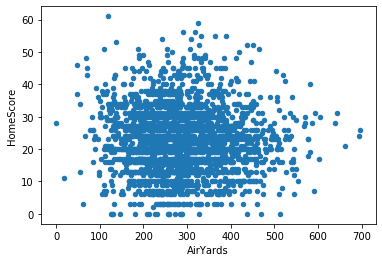

In [329]:
chart_charterson = chartychart.plot.scatter('AirYards', 'HomeScore')

In [334]:
chart_charterson.attributes

AttributeError: 'AxesSubplot' object has no attribute 'attributes'

In [339]:
good_teams['HomeWins'] = good_teams['Winner'] == good_teams['HomeTeam']

In [347]:
good_teams['AwayWins'] = good_teams['Winner'] == good_teams['AwayTeam']

In [350]:
good_teams['BadTeamWon'] = [good_teams['HomeWins'][x] and good_teams['HomeTeamIsGood'][x] != True for x in range(len(good_teams))]

In [355]:
bad_teams_winning = good_teams[good_teams['BadTeamWon']]

In [375]:
temp = bad_teams_winning[['GameID', 'posteam', 'Yards.Gained', 'PlayType', 
                   'PassAttempt', 'AirYards', 'YardsAfterCatch', 'QBHit',
                  'RushAttempt', 'Fumble', 'Sack', 'Accepted.Penalty', 'PenalizedTeam', 'HomeTeam',
                   'AwayTeam', 'HomeScore', 'AwayScore']]

In [376]:
temp['PenOnOffense'] = temp['PenalizedTeam'] == temp['posteam']
temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,GameID,posteam,Yards.Gained,PlayType,PassAttempt,AirYards,YardsAfterCatch,QBHit,RushAttempt,Fumble,Sack,Accepted.Penalty,PenalizedTeam,HomeTeam,AwayTeam,HomeScore,AwayScore,PenOnOffense
1991,2009092005,NE,20,Kickoff,0,0,0,0,0,0,0,0,NaN,NYJ,NE,0.0,0.0,False
1992,2009092005,NE,12,Run,0,0,0,0,1,0,0,0,NaN,NYJ,NE,0.0,0.0,False
1993,2009092005,NE,3,Pass,1,2,1,0,0,0,0,0,NaN,NYJ,NE,0.0,0.0,False
1994,2009092005,NE,19,Pass,1,1,18,0,0,0,0,0,NaN,NYJ,NE,0.0,0.0,False
1995,2009092005,NE,-1,Run,0,0,0,0,1,0,0,0,NaN,NYJ,NE,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217774,2017122409,JAX,19,Pass,1,17,2,0,0,0,0,0,NaN,SF,JAX,44.0,31.0,False
217775,2017122409,NaN,0,Timeout,0,0,0,0,0,0,0,0,NaN,SF,JAX,44.0,31.0,False
217776,2017122409,JAX,9,Pass,1,4,5,0,0,0,0,0,NaN,SF,JAX,44.0,31.0,False
217777,2017122409,JAX,7,Pass,1,3,4,0,0,0,0,0,NaN,SF,JAX,44.0,31.0,False


In [380]:
temp['PenalizedTeam'] = temp['PenalizedTeam'] == temp['posteam']
(temp.groupby(['GameID', 'posteam']).aggregate({
                                        'Yards.Gained' : sum,
                                        'PlayType' : list,
                                        'PassAttempt' : sum,
                                        'AirYards' : sum,
                                        'YardsAfterCatch' : sum,
                                        'QBHit' : sum,
                                        'RushAttempt' : sum,
                                        'Fumble' : sum,
                                        'Sack' : sum,
                                        'Accepted.Penalty' : sum,
                                        'PenOnOffense' : sum,
                                        'HomeTeam' : max,
                                        'AwayTeam' : max,
                                            }))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Yards.Gained  \
GameID     posteam                 
2009092005 NE                437   
           NYJ               400   
2009100410 DAL               413   
           DEN               401   
2009100412 PIT               580   
...                          ...   
2017121100 NE                306   
2017121710 SF                479   
           TEN               383   
2017122409 JAX               544   
           SF                395   

                                                             PlayType  \
GameID     posteam                                                      
2009092005 NE       [Kickoff, Run, Pass, Pass, Run, Run, Pass, Pun...   
           NYJ      [Sack, Run, Run, Punt, Run, Kickoff, Pass, Run...   
2009100410 DAL      [Kickoff, Run, Run, Pass, Run, Pass, Run, Sack...   
           DEN      [Pass, Pass, Pass, Punt, Kickoff, Pass, Run, P...   
2009100412 PIT      [Kickoff, Pass, Pass, Pass, Run, Run, Run, Ext...   
...                                                               ...   
2017121100 NE       [Kickoff, Run, Pass, Pass, Kickoff, Pass, Run,...   
2017121710 SF       [Kickoff, Run, Pass, Run, Run, Pass, Pass, Run...   
           TEN      [Kickoff, Sack, Run, Pass, Punt, Kickoff, Run,...   
2017122409 JAX      [Kickoff, Run, Pass, Pass, Punt, Kickoff, Pass...   
           SF       [Kickoff, Run, Pass, Pass, Run, Pass, Pass, Ru...   

                    PassAttempt  AirYards  YardsAfterCatch  QBHit  \
GameID     posteam                                                  
2009092005 NE                47       379              114      7   
           NYJ               22       179               74      2   
2009100410 DAL               41       249              166      5   
           DEN               29       286              140      4   
2009100412 PIT               34       279              131      3   
...                         ...       ...              ...    ...   
2017121100 NE                43       386              132      6   
2017121710 SF                42       353              166      4   
           TEN               33       302               55      4   
2017122409 JAX               51       390              166      5   
           SF                30       238              111      4   

                    RushAttempt  Fumble  Sack  Accepted.Penalty  PenOnOffense  \
GameID     posteam                                                              
2009092005 NE                20       0     0                 3           1.0   
           NYJ               29       2     2                 1           0.0   
2009100410 DAL               25       2     5                 2           0.0   
           DEN               24       2     3                 4           1.0   
2009100412 PIT               34       2     3                 0           0.0   
...                         ...     ...   ...               ...           ...   
2017121100 NE                10       0     2                 1           0.0   
2017121710 SF                22       0     3                 3           2.0   
           TEN               28       1     1                 3           1.0   
2017122409 JAX               28       2     2                 2           0.0   
           SF                34       0     1                 5           0.0   

                   HomeTeam AwayTeam  
GameID     posteam                    
2009092005 NE           NYJ       NE  
           NYJ          NYJ       NE  
2009100410 DAL          DEN      DAL  
           DEN          DEN      DAL  
2009100412 PIT          PIT       SD  
...                     ...      ...  
2017121100 NE           MIA       NE  
2017121710 SF            SF      TEN  
           TEN           SF      TEN  
2017122409 JAX           SF      JAX  
           SF            SF      JAX  

[254 rows x 13 columns]

In [379]:
bad_teams_winning['PlayType'].value_counts()

Pass                  8973
Run                   6581
Kickoff               1287
Punt                  1200
Timeout                948
Sack                   562
Field Goal             547
Extra Point            515
Quarter End            280
QB Kneel               198
Two Minute Warning     197
End of Game            104
Spike                   33
Half End                 3
Name: PlayType, dtype: int64

In [381]:
bad_teams_winning

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins,AwayTeamIsGood,HomeTeamIsGood,HomeWins,AwayWins,BadTeamWon
1991,2009092005,1,1,NaN,3600.0,NYJ,30.0,0,0,0.0,NaN,NE,NYJ,J.Feely kicks 69 yards from NYJ 30 to NE 1. L....,20,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,NYJ,NE,0.323526,0.100286,0.514325,0.511173,0.003152,2009,0.0,0.0,True,True,NYJ,9.0,10.0,True,False,True,False,True
1992,2009092005,1,1,1.0,3596.0,NE,79.0,10,12,0.0,1.0,NE,NYJ,(14:56) (Shotgun) L.Maroney right end to NE 33...,12,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,guard,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,NYJ,NE,0.423812,1.156441,0.511173,0.474595,0.036578,2009,0.0,0.0,True,True,NYJ,9.0,10.0,True,False,True,False,True
1993,2009092005,1,1,1.0,3555.0,NE,67.0,10,15,0.0,0.0,NE,NYJ,"(14:15) (No Huddle, Shotgun) T.Brady pass shor...",3,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Brady,00-0019596,1,Complete,Short,2,1,0,middle,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,NYJ,NE,1.580253,-0.263024,0.474595,0.481143,-0.006548,2009,0.0,0.0,True,True,NYJ,9.0,10.0,True,False,True,False,True
1994,2009092005,1,1,2.0,3517.0,NE,58.0,1,43,0.0,1.0,NE,NYJ,(13:37) (No Huddle) T.Brady pass short left to...,19,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Brady,00-0019596,1,Complete,Short,1,18,0,left,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,NYJ,NE,2.792371,0.825848,0.434673,0.405896,0.028776,2009,0.0,0.0,True,True,NYJ,9.0,10.0,True,False,True,False,True
1995,2009092005,1,1,1.0,3488.0,NYJ,39.0,10,39,0.0,0.0,NE,NYJ,"(13:08) (No Huddle, Shotgun) L.Maroney right t...",-1,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,tackle,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,NYJ,NE,3.618219,-0.615468,0.405896,0.425049,-0.019153,2009,0.0,0.0,True,True,NYJ,9.0,10.0,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217774,2017122409,24,4,4.0,32.0,JAX,73.0,1,28,0.0,0.0,JAX,SF,"(:32) (No Huddle, Shotgun) B.Bortles pass deep...",19,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Bortles,00-0031407,1,Complete,Deep,17,2,0,right,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,31.0,44.0,SF,JAX,0.175481,1.340487,0.975060,0.955046,0.020015,2017,44.0,31.0,False,False,SF,6.0,10.0,True,False,True,False,True
217775,2017122409,24,4,NaN,23.0,JAX,27.0,0,28,0.0,NaN,NaN,NaN,Timeout #3 by JAX at 00:23.,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,NaN,NaN,SF,JAX,0.000000,0.000000,NaN,NaN,0.000000,2017,44.0,31.0,False,False,SF,6.0,10.0,True,False,True,False,True
217776,2017122409,24,4,1.0,23.0,JAX,54.0,10,44,0.0,0.0,JAX,SF,(:23) (Shotgun) B.Bortles pass short left to B...,9,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Bortles,00-0031407,1,Complete,Short,4,5,0,left,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,31.0,44.0,SF,JAX,1.515968,0.464207,0.955046,0.963362,-0.008316,2017,44.0,31.0,False,False,SF,6.0,10.0,True,False,True,False,True
217777,2017122409,24,4,2.0,17.0,SF,45.0,1,44,0.0,0.0,JAX,SF,(:17) (Shotgun) B.Bortles pass short left to L...,7,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Bortles,00-0031407,1,Complete,Short,3,4,0,left,0,0,NaN,NaN,1,NaN

In [389]:
true_vals = []
for x in range(len(good_teams)):
    if good_teams['AwayTeamIsGood'][x] and good_teams['posteam'][x] == good_teams['AwayTeam'][x]:
        true_vals.append(True)
    elif good_teams['HomeTeamIsGood'][x] and good_teams['posteam'][x] == good_teams['HomeTeam'][x]:
        true_vals.append(True)
    else:
        true_vals.append(False)
good_teams[true_vals]

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins,AwayTeamIsGood,HomeTeamIsGood,HomeWins,AwayWins,BadTeamWon
9,2009091304,2,1,NaN,3388.0,CLE,30.0,0,0,0.0,NaN,MIN,CLE,P.Dawson kicks 69 yards from CLE 30 to MIN 1. ...,29,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,3.0,CLE,MIN,0.387730,0.965335,0.592167,0.561974,0.030194,2009,3.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
10,2009091304,2,1,1.0,3381.0,MIN,70.0,10,1,0.0,0.0,MIN,CLE,(11:21) A.Peterson left tackle to MIN 31 for 1...,1,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,left,tackle,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,3.0,CLE,MIN,1.353065,-0.587073,0.561974,0.579142,-0.017169,2009,3.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
11,2009091304,2,1,2.0,3345.0,MIN,69.0,9,1,0.0,0.0,MIN,CLE,(10:45) A.Peterson right guard to MIN 31 for n...,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,guard,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,3.0,CLE,MIN,0.765991,-0.993467,0.579142,0.609971,-0.030829,2009,3.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
12,2009091304,2,1,3.0,3304.0,MIN,69.0,9,0,0.0,0.0,MIN,CLE,(10:04) (Shotgun) B.Favre pass short right to ...,-1,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Favre,00-0005106,1,Complete,Short,0,-1,0,right,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,3.0,CLE,MIN,-0.227476,-1.703410,0.609971,0.666157,-0.056186,2009,3.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
13,2009091304,2,1,4.0,3273.0,MIN,70.0,10,0,0.0,1.0,MIN,CLE,"(9:33) C.Kluwe punts 51 yards to CLE 19, Cente...",3,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,3.0,CLE,MIN,-1.930886,1.309801,0.666157,0.601793,0.064363,2009,3.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219581,2017123100,24,4,1.0,22.0,ATL,9.0,9,66,1.0,0.0,CAR,ATL,(:22) (No Huddle) C.Newton spiked the ball to ...,0,0,NaN,NaN,NaN,0,0,NaN,Spike,NaN,00-0027939,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,4.009351,-0.342579,0.976079,0.970007,0.006072,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219582,2017123100,24,4,2.0,21.0,ATL,14.0,14,61,1.0,0.0,CAR,ATL,(:21) (Shotgun) C.Newton pass incomplete short...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Short,14,0,0,middle,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,3.327930,-0.461666,0.967556,0.947763,0.019793,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219583,2017123100,24,4,3.0,16.0,ATL,19.0,19,56,1.0,1.0,CAR,ATL,(:16) (Shotgun) C.Newton pass deep left intend...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Deep,19,0,0,left,1,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,2.684219,-2.684219,0.949909,0.986102,-0.036193,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219584,2017123100,25,4,1.0,8.0,ATL,80.0,10,-1,0.0,0.0,ATL,CAR,(:08) M.Ryan kneels to ATL 19 for -1 yards.,-1,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,None,0,NaN

In [390]:
possessions_good = good_teams[true_vals].reset_index(drop = True)

In [393]:
good_poss_q1 = possessions_good[possessions_good['qtr'] == 1]

In [396]:
good_poss_q1['PlayType'].value_counts() / len(good_poss_q1)

Pass           0.428928
Run            0.369083
Kickoff        0.066498
Punt           0.058904
Extra Point    0.032001
Sack           0.024010
Field Goal     0.020539
Timeout        0.000036
Name: PlayType, dtype: float64

In [397]:
good_poss_q2 = possessions_good[possessions_good['qtr'] == 2]
good_poss_q3 = possessions_good[possessions_good['qtr'] == 3]
good_poss_q4 = possessions_good[possessions_good['qtr'] == 4]

In [398]:
good_poss_q2['PlayType'].value_counts() / len(good_poss_q2)

Pass           0.478392
Run            0.301675
Punt           0.054628
Kickoff        0.051791
Extra Point    0.039113
Field Goal     0.033931
Sack           0.029088
QB Kneel       0.008328
Spike          0.002992
Timeout        0.000031
Half End       0.000031
Name: PlayType, dtype: float64

In [399]:
good_poss_q3['PlayType'].value_counts() / len(good_poss_q3)

Pass           0.433455
Run            0.360652
Kickoff        0.069942
Punt           0.056211
Extra Point    0.032253
Sack           0.025817
Field Goal     0.021633
QB Kneel       0.000036
Name: PlayType, dtype: float64

In [400]:
good_poss_q4['PlayType'].value_counts() / len(good_poss_q4)

Pass           0.391240
Run            0.357471
Punt           0.054023
Kickoff        0.048680
QB Kneel       0.042187
Extra Point    0.029916
Field Goal     0.026250
Sack           0.024169
End of Game    0.023454
Spike          0.002547
Timeout        0.000062
Name: PlayType, dtype: float64

In [403]:
good_teams

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins,AwayTeamIsGood,HomeTeamIsGood,HomeWins,AwayWins,BadTeamWon
0,2009091304,1,1,NaN,3600.0,MIN,30.0,0,31,0.0,NaN,CLE,MIN,R.Longwell kicks onside 21 yards from MIN 30 t...,0,0,NaN,NaN,NaN,0,1,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,0.323526,2.537745,0.485675,0.562755,0.077080,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
1,2009091304,1,1,1.0,3599.0,CLE,51.0,10,6,0.0,0.0,CLE,MIN,(14:59) J.Lewis left guard to MIN 45 for 6 yar...,6,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,left,guard,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,2.861271,0.216536,0.562755,0.572188,0.009433,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
2,2009091304,1,1,2.0,3559.0,MIN,45.0,4,6,0.0,0.0,CLE,MIN,(14:19) B.Quinn pass incomplete short left to ...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Quinn,00-0025409,1,Incomplete Pass,Short,0,0,0,left,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,3.077808,-0.784595,0.572188,0.547411,-0.024777,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
3,2009091304,1,1,3.0,3553.0,MIN,45.0,4,31,0.0,1.0,CLE,MIN,(14:13) (Shotgun) J.Cribbs right tackle to MIN...,5,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,end,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,2.293212,1.267024,0.547411,0.590727,0.043316,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
4,2009091304,1,1,1.0,3515.0,MIN,40.0,10,29,0.0,1.0,CLE,MIN,(13:35) B.Quinn pass deep right to R.Royal to ...,18,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Quinn,00-0025409,1,Complete,Deep,18,0,1,right,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,3.560237,0.776262,0.590727,0.619625,0.028898,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219581,2017123100,24,4,1.0,22.0,ATL,9.0,9,66,1.0,0.0,CAR,ATL,(:22) (No Huddle) C.Newton spiked the ball to ...,0,0,NaN,NaN,NaN,0,0,NaN,Spike,NaN,00-0027939,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,4.009351,-0.342579,0.976079,0.970007,0.006072,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219582,2017123100,24,4,2.0,21.0,ATL,14.0,14,61,1.0,0.0,CAR,ATL,(:21) (Shotgun) C.Newton pass incomplete short...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Short,14,0,0,middle,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,3.327930,-0.461666,0.967556,0.947763,0.019793,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219583,2017123100,24,4,3.0,16.0,ATL,19.0,19,56,1.0,1.0,CAR,ATL,(:16) (Shotgun) C.Newton pass deep left intend...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Deep,19,0,0,left,1,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,2.684219,-2.684219,0.949909,0.986102,-0.036193,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219584,2017123100,25,4,1.0,8.0,ATL,80.0,10,-1,0.0,0.0,ATL,CAR,(:08) M.Ryan kneels to ATL 19 for -1 yards.,-1,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,N

In [406]:
bad_teams = nfl_data[[nfl_data['HomeTeamWins'][x] < 10 or nfl_data['AwayTeamWins'][x] < 10 for x in range(len(nfl_data))]].reset_index(drop = True)

In [408]:
bad_teams['AwayTeamIsBad'] = bad_teams['AwayTeamWins'] < 10

In [409]:
bad_teams['HomeTeamIsBad'] = bad_teams['HomeTeamWins'] < 10

In [410]:
bad_teams

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins,AwayTeamIsBad,HomeTeamIsBad
0,2009091000,1,1,NaN,3600.0,TEN,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,39,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,0.323526,2.014474,0.485675,0.546433,0.060758,2009,0.0,0.0,False,True,PIT,8.0,8.0,True,True
1,2009091000,1,1,1.0,3593.0,PIT,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,5,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,2.338000,0.077907,0.546433,0.551088,0.004655,2009,0.0,0.0,False,True,PIT,8.0,8.0,True,True
2,2009091000,1,1,2.0,3556.0,PIT,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,-3,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,end,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,2.415907,-1.402760,0.551088,0.510793,-0.040295,2009,0.0,0.0,False,True,PIT,8.0,8.0,True,True
3,2009091000,1,1,3.0,3515.0,PIT,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,1.013147,-1.712583,0.510793,0.461217,-0.049576,2009,0.0,0.0,False,True,PIT,8.0,8.0,True,True
4,2009091000,1,1,4.0,3507.0,PIT,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,PIT,TEN,-0.699436,2.097796,0.461217,0.558929,0.097712,2009,0.0,0.0,False,True,PIT,8.0,8.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347387,2017123101,29,4,NaN,28.0,BAL,32.0,0,-4,0.0,0.0,NaN,NaN,Timeout #1 by BAL at 00:28.,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,NaN,NaN,BAL,CIN,0.000000,0.000000,NaN,NaN,0.000000,2017,27.0,30.0,True,True,CIN,9.0,6.0,True,True
347388,2017123101,29,4,3.0,28.0,BAL,77.0,14,-4,0.0,0.0,BAL,CIN,(:28) (Shotgun) J.Flacco pass incomplete short...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,J.Flacco,00-0026158,1,Incomplete Pass,Short,12,0,0,middle,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,27.0,30.0,BAL,CIN,0.200905,-0.340818,0.080409,0.050478,-0.029931,2017,27.0,30.0,True,True,CIN,9.0,6.0,True,True
347389,2017123101,29,4,4.0,24.0,BAL,77.0,14,9,0.0,1.0,BAL,CIN,(:24) (Shotgun) J.Flacco pass short middle to ...,13,0,NaN,NaN,NaN,0,0,NaN,Pass,J.Flacco,00-0026158,1,Complete,Short,10,3,0,middle,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,27.0,30.0,BAL,CIN,-0.139913,0.139913,0.050478,0.030881,-0.019597,2017,27.0,30.0,True,True,CIN,9.0,6.0,True,True
347390,2017123101,30,4,1.0,14.0,BAL,36.0,10,-1,0.0,0.0,CIN,BAL,(:14) A.Dalton kneels to BAL 37 for -1 yards.,-1,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,30.0,27.0,BAL,CIN,0.000000,0.000000,0.030881,0.000000,0.030881,2017,27.0,30.0,True,True,CIN,9.0,6.0,True,True


In [413]:
true_vals = []
for x in range(len(bad_teams)):
    if bad_teams['AwayTeamIsBad'][x] and bad_teams['posteam'][x] == bad_teams['AwayTeam'][x]:
        true_vals.append(True)
    elif bad_teams['HomeTeamIsBad'][x] and bad_teams['posteam'][x] == bad_teams['HomeTeam'][x]:
        true_vals.append(True)
    else:
        true_vals.append(False)
bad_team_pos = bad_teams[true_vals]

In [415]:
bad_team_pos_q1 = bad_team_pos[bad_team_pos['qtr'] == 1]

In [425]:
bad_team_pos_q1['PlayType'].value_counts() / len(bad_team_pos_q1) * 100

Pass           40.411785
Run            37.834877
Kickoff         7.771569
Punt            7.045653
Sack            2.619609
Extra Point     2.276145
Field Goal      2.038505
QB Kneel        0.001857
Name: PlayType, dtype: float64

In [417]:
bad_team_pos_q2 = bad_team_pos[bad_team_pos['qtr'] == 2]
bad_team_pos_q3 = bad_team_pos[bad_team_pos['qtr'] == 3]
bad_team_pos_q4 = bad_team_pos[bad_team_pos['qtr'] == 4]

In [427]:
bad_team_pos_q2['PlayType'].value_counts() / len(bad_team_pos_q2) * 100

Pass           46.011461
Run            30.685297
Punt            6.678703
Kickoff         6.231258
Sack            3.235733
Field Goal      3.191773
Extra Point     2.868357
QB Kneel        0.784991
Spike           0.298297
Timeout         0.014130
Name: PlayType, dtype: float64

In [428]:
bad_team_pos_q3['PlayType'].value_counts() / len(bad_team_pos_q3) * 100

Pass           42.401988
Run            35.481318
Kickoff         7.894349
Punt            6.668507
Sack            3.167679
Extra Point     2.398307
Field Goal      1.982330
Timeout         0.003681
QB Kneel        0.001841
Name: PlayType, dtype: float64

In [429]:
bad_team_pos_q4['PlayType'].value_counts() / len(bad_team_pos_q4) * 100

Pass           48.198412
Run            28.579079
Kickoff         5.575361
Punt            5.191328
Sack            3.422635
Extra Point     2.542879
Field Goal      2.200156
QB Kneel        2.114475
End of Game     1.768693
Spike           0.403923
Timeout         0.003060
Name: PlayType, dtype: float64

In [430]:
good_teams

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins,AwayTeamIsGood,HomeTeamIsGood,HomeWins,AwayWins,BadTeamWon
0,2009091304,1,1,NaN,3600.0,MIN,30.0,0,31,0.0,NaN,CLE,MIN,R.Longwell kicks onside 21 yards from MIN 30 t...,0,0,NaN,NaN,NaN,0,1,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,0.323526,2.537745,0.485675,0.562755,0.077080,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
1,2009091304,1,1,1.0,3599.0,CLE,51.0,10,6,0.0,0.0,CLE,MIN,(14:59) J.Lewis left guard to MIN 45 for 6 yar...,6,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,left,guard,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,2.861271,0.216536,0.562755,0.572188,0.009433,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
2,2009091304,1,1,2.0,3559.0,MIN,45.0,4,6,0.0,0.0,CLE,MIN,(14:19) B.Quinn pass incomplete short left to ...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Quinn,00-0025409,1,Incomplete Pass,Short,0,0,0,left,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,3.077808,-0.784595,0.572188,0.547411,-0.024777,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
3,2009091304,1,1,3.0,3553.0,MIN,45.0,4,31,0.0,1.0,CLE,MIN,(14:13) (Shotgun) J.Cribbs right tackle to MIN...,5,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,end,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,2.293212,1.267024,0.547411,0.590727,0.043316,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
4,2009091304,1,1,1.0,3515.0,MIN,40.0,10,29,0.0,1.0,CLE,MIN,(13:35) B.Quinn pass deep right to R.Royal to ...,18,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Quinn,00-0025409,1,Complete,Deep,18,0,1,right,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,CLE,MIN,3.560237,0.776262,0.590727,0.619625,0.028898,2009,0.0,0.0,False,False,MIN,5.0,12.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219581,2017123100,24,4,1.0,22.0,ATL,9.0,9,66,1.0,0.0,CAR,ATL,(:22) (No Huddle) C.Newton spiked the ball to ...,0,0,NaN,NaN,NaN,0,0,NaN,Spike,NaN,00-0027939,0,NaN,NaN,0,0,0,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,4.009351,-0.342579,0.976079,0.970007,0.006072,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219582,2017123100,24,4,2.0,21.0,ATL,14.0,14,61,1.0,0.0,CAR,ATL,(:21) (Shotgun) C.Newton pass incomplete short...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Short,14,0,0,middle,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,3.327930,-0.461666,0.967556,0.947763,0.019793,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219583,2017123100,24,4,3.0,16.0,ATL,19.0,19,56,1.0,1.0,CAR,ATL,(:16) (Shotgun) C.Newton pass deep left intend...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,C.Newton,00-0027939,1,Incomplete Pass,Deep,19,0,0,left,1,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,10.0,22.0,ATL,CAR,2.684219,-2.684219,0.949909,0.986102,-0.036193,2017,22.0,10.0,True,True,ATL,10.0,10.0,True,True,True,False,False
219584,2017123100,25,4,1.0,8.0,ATL,80.0,10,-1,0.0,0.0,ATL,CAR,(:08) M.Ryan kneels to ATL 19 for -1 yards.,-1,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,N

In [433]:
kansas_city = nfl_data[nfl_data['posteam'] == 'KC'].reset_index(drop = True)

In [437]:
kansas_city.groupby('Season').mean()

,GameID,Drive,qtr,down,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,Yards.Gained,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,HomeScore,AwayScore,Divisional,Conference,HomeTeamWins,AwayTeamWins
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,2.009161e+09,13.478397,2.598586,2.094159,1691.186960,51.834250,7.827965,20.800471,0.043205,0.266892,5.454831,0.023566,0.000786,0.000786,0.421838,3.398272,1.018853,0.059701,0.013354,0.341712,0.234878,36.379310,0.021210,0.035350,0.020424,0.223881,7.177445,13.078864,1.435300,-0.085804,0.459995,0.459923,0.000996,9.439120,10.915947,0.380990,0.741555,6.094266,6.022781
2010,2.010168e+09,12.404009,2.596762,2.027119,1689.713184,49.073246,7.579800,24.457980,0.048574,0.293399,5.569005,0.033924,0.000000,0.000771,0.364688,2.812645,1.168080,0.054742,0.006168,0.422513,0.211257,37.160000,0.012336,0.024672,0.023901,0.266769,10.675697,9.800310,1.702180,0.009533,0.592394,0.593170,0.003190,12.215883,8.337702,0.368543,0.745567,8.298381,8.016962
2011,2.011161e+09,12.313505,2.562701,2.049956,1724.803859,53.766077,7.931672,23.622186,0.035370,0.298546,5.169614,0.017685,0.000804,0.001608,0.401125,3.293408,1.163987,0.057074,0.014469,0.383441,0.241158,36.933333,0.012058,0.027331,0.027331,0.303055,5.802429,11.000810,1.404927,-0.097821,0.497819,0.495987,0.000641,8.477492,8.481511,0.365756,0.750000,7.535370,7.688103
2012,2.012107e+09,11.910256,2.574519,2.019417,1733.908654,52.250000,7.872596,23.720353,0.024038,0.305556,5.278846,0.020833,0.000000,0.000000,0.376603,3.096154,1.001603,0.064904,0.016026,0.396635,0.219551,37.264706,0.020032,0.031250,0.020032,0.189904,6.130016,14.386035,1.538506,-0.115641,0.525188,0.527223,-0.000523,10.904647,9.653045,0.338942,0.713942,4.554487,5.629808
2013,2.013107e+09,12.640379,2.507886,1.998253,1786.576953,48.358044,7.807571,24.593849,0.057571,0.291910,5.514196,0.034700,0.000789,0.000000,0.428233,2.813880,1.488959,0.055994,0.007098,0.334385,0.261830,37.357143,0.014196,0.031546,0.019716,0.185331,12.895238,10.677778,1.702256,0.039365,0.460219,0.461902,0.003896,10.727129,12.979495,0.376183,0.739748,8.692429,8.545741
2014,2.014107e+09,10.852766,2.534468,1.990593,1769.844255,48.781277,7.815319,26.632340,0.053617,0.300271,5.790638,0.033191,0.000851,0.000851,0.421277,2.468085,1.622128,0.063830,0.005106,0.348936,0.271489,35.100000,0.020426,0.042553,0.026383,0.278298,9.852263,9.361230,1.761388,0.068079,0.588665,0.587596,0.003999,11.218723,8.085957,0.387234,0.771064,8.874894,8.286809
2015,2.015166e+09,11.816568,2.554522,2.005623,1740.271344,48.851226,7.775993,26.266272,0.045647,0.274194,5.398140,0.034658,0.000000,0.005072,0.402367,2.666948,1.650888,0.060017,0.005917,0.357566,0.262891,39.810811,0.009298,0.038039,0.033812,0.369400,11.822828,8.954855,1.719569,0.062362,0.567745,0.568049,0.003463,11.561285,9.439560,0.358411,0.743026,9.953508,9.202874
2016,2.016162e+09,12.355556,2.615638,2.012716,1671.668313,47.910288,7.655144,26.106173,0.060905,0.289336,5.509465,0.030453,0.000000,0.003292,0.449383,3.071605,1.708642,0.053498,0.006584,0.322634,0.301235,35.628571,0.013169,0.026337,0.021399,0.218930,10.778329,11.455749,1.850833,0.037772,0.581982,0.583717,0.002550,12.776132,9.543210,0.400823,0.783539,9.808230,9.074074
2017,2.017108e+09,11.431987,2.605111,1.985415,1676.110470,49.208574,7.845012,28.286068,0.042045,0.276074,6.017312,0.033800,0.001649,0.003298,0.447650,3.464138,1.759275,0.065952,0.006595,0.327288,0.299258,37.111111,0.009893,0.030503,0.027205,0.300082,11.400331,10.180314,1.742360,0.103796,0.502243,0.500301,0.004061,10.891179,10.783182,0.370981,0.749382,8.301731,8.968673


In [441]:
win_dict

{'ARI': {2009: 10.0,
  2010: 4.0,
  2011: 7.0,
  2012: 6.0,
  2013: 9.0,
  2014: 11.0,
  2015: 13.0,
  2016: 7.0,
  2017: 8.0},
 'ATL': {2009: 9.0,
  2010: 13.0,
  2011: 10.0,
  2012: 12.0,
  2013: 4.0,
  2014: 6.0,
  2015: 8.0,
  2016: 12.0,
  2017: 10.0},
 'BAL': {2009: 9.0,
  2010: 12.0,
  2011: 12.0,
  2012: 10.0,
  2013: 8.0,
  2014: 10.0,
  2015: 5.0,
  2016: 8.0,
  2017: 9.0},
 'BUF': {2009: 6.0,
  2010: 4.0,
  2011: 6.0,
  2012: 6.0,
  2013: 6.0,
  2014: 9.0,
  2015: 8.0,
  2016: 7.0,
  2017: 9.0},
 'CAR': {2009: 8.0,
  2010: 2.0,
  2011: 6.0,
  2012: 7.0,
  2013: 11.0,
  2014: 7.0,
  2015: 15.0,
  2016: 6.0,
  2017: 10.0},
 'CHI': {2009: 7.0,
  2010: 11.0,
  2011: 8.0,
  2012: 10.0,
  2013: 9.0,
  2014: 5.0,
  2015: 6.0,
  2016: 3.0,
  2017: 5.0},
 'CIN': {2009: 10.0,
  2010: 4.0,
  2011: 9.0,
  2012: 10.0,
  2013: 10.0,
  2014: 10.0,
  2015: 12.0,
  2016: 6.0,
  2017: 6.0},
 'CLE': {2009: 5.0,
  2010: 5.0,
  2011: 4.0,
  2012: 5.0,
  2013: 4.0,
  2014: 7.0,
  2015: 3.0,
  201

In [442]:
seattle = nfl_data[nfl_data['posteam'] == 'SEA'].reset_index(drop = True)

In [445]:
win_dict['SEA']

{2009: 5.0,
 2010: 7.0,
 2011: 7.0,
 2012: 11.0,
 2013: 14.0,
 2014: 12.0,
 2015: 10.0,
 2016: 10.0,
 2017: 9.0}

In [447]:
seattle.groupby('Season').sum()

,GameID,Drive,qtr,down,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,Yards.Gained,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,HomeScore,AwayScore,Divisional,Conference,HomeTeamWins,AwayTeamWins
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,2553642360826,16475,3262,2359.0,2175498.0,64088.0,10165,30032,61.0,355.0,6935,29,0,1,611,4260,2077,86,19,390,372,879.0,30,41,31,364,9876.0,17237.0,2055.520218,-110.656024,800.776658,797.992392,0.435567,17475.0,9875.0,474.0,953.0,9268.0,6649.0
2010,2414217130317,15416,3055,2192.0,2109522.0,58897.0,9157,27049,72.0,320.0,6458,33,1,2,542,4586,1493,57,22,373,324,971.0,15,36,24,240,10220.0,15761.0,1980.163931,-71.362922,709.789919,706.236237,1.357768,15085.0,11377.0,483.0,918.0,8744.0,8657.0
2011,2493856471908,15692,3164,2331.0,2150296.0,63536.0,10000,26413,54.0,327.0,6519,34,0,1,508,4489,1488,106,14,440,298,1101.0,21,47,23,271,10467.0,12138.0,1890.834305,-71.064837,676.041066,675.554127,0.950407,12174.0,10660.0,489.0,945.0,9298.0,9499.0
2012,2366238395257,13960,3057,2120.0,1992520.0,57648.0,8967,32500,54.0,309.0,6594,50,1,0,406,4070,1246,62,10,521,259,957.0,16,33,26,340,14012.0,10139.0,2040.976638,97.397841,667.188418,665.875836,6.358809,13671.0,10787.0,441.0,886.0,10814.0,11503.0
2013,2413715213341,14652,3063,2172.0,2086967.0,57085.0,9411,31574,83.0,325.0,6344,44,0,2,420,4001,1512,89,9,491,266,1279.0,25,44,43,516,13977.0,7903.0,2090.241788,51.079009,624.394363,620.833092,4.787165,11664.0,10552.0,429.0,882.0,13229.0,12931.0
2014,2483395302094,14355,3195,2217.0,2090678.0,58544.0,9939,33589,81.0,322.0,7128,42,1,1,454,3777,1814,86,8,506,287,1377.0,21,42,24,258,13325.0,10504.0,2233.479756,99.006785,678.760203,675.435260,6.081658,13025.0,11151.0,448.0,913.0,12365.0,12951.0
2015,2541125685109,14355,3314,2240.0,2095833.0,62677.0,9824,35372,55.0,341.0,7388,48,1,0,490,4111,1864,110,8,481,334,1170.0,15,47,32,338,15767.0,10786.0,2116.133626,146.125032,585.467993,582.524062,6.294266,12277.0,14704.0,498.0,949.0,11542.0,11435.0
2016,2485932989578,15492,3257,2231.0,2050112.0,61799.0,9837,31934,74.0,327.0,6782,37,1,3,567,4849,1837,106,12,387,369,1263.0,23,42,24,224,13041.0,12146.0,2059.663571,27.902518,746.573675,744.600004,3.963040,15395.0,10168.0,466.0,930.0,10699.0,10436.0
2017,2535504757016,16190,3165,2268.0,2214473.0,65335.0,10307,30370,61.0,342.0,6890,41,2,1,560,5415,1609,118,12,395,343,1105.0,18,43,43,489,10575.0,14088.0,1910.401464,-10.885312,584.541044,583.945362,2.807129,11408.0,13561.0,478.0,937.0,10641.0,10502.0


In [448]:
seattle['Turnovers'] = seattle['InterceptionThrown'] + seattle['Fumble']

In [455]:
list(seattle.groupby('Season').sum()['Turnovers'].values)

[49, 37, 35, 26, 34, 29, 23, 35, 30]

In [451]:
nfl_data['Turnovers'] = nfl_data['InterceptionThrown'] + nfl_data['Fumble']

In [459]:
list((nfl_data.groupby('Season').sum()/32)['Turnovers'].values)

[38.0625,
 37.6875,
 34.96875,
 34.875,
 34.71875,
 33.90625,
 32.875,
 31.46875,
 32.09375]

In [467]:
list(nfl_data[nfl_data['PassOutcome'] == 'Complete'][['Season', 'YardsAfterCatch']].groupby('Season').mean()['YardsAfterCatch'].values)

[5.238751324790442,
 5.156896387379659,
 5.2418075857456765,
 4.965997051234796,
 5.248807273381942,
 5.313513995364593,
 5.249632257506273,
 5.034972299168975,
 5.174133014442094]

In [469]:
seattle

,GameID,Drive,qtr,down,TimeSecs,SideofField,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,Yards.Gained,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,RushAttempt,RunLocation,RunGap,Reception,ReturnResult,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,Sack,Accepted.Penalty,PenalizedTeam,PenaltyType,Penalty.Yards,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,ExpPts,EPA,Home_WP_pre,Home_WP_post,WPA,Season,HomeScore,AwayScore,Divisional,Conference,Winner,HomeTeamWins,AwayTeamWins,Turnovers
0,2009091311,2,1,1.0,3593.0,STL,19.0,10,0,0.0,0.0,SEA,STL,(14:53) J.Jones right tackle to STL 19 for no ...,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,tackle,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,SEA,STL,4.416338,-0.429972,0.615651,0.602837,-0.012814,2009,0.0,0.0,True,True,SEA,5.0,1.0,0
1,2009091311,2,1,2.0,3557.0,STL,19.0,10,0,0.0,0.0,SEA,STL,(14:17) M.Hasselbeck pass incomplete deep left...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,M.Hasselbeck,00-0007091,1,Incomplete Pass,Deep,19,0,0,left,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,SEA,STL,3.986365,-0.754017,0.602837,0.577746,-0.025091,2009,0.0,0.0,True,True,SEA,5.0,1.0,0
2,2009091311,2,1,3.0,3551.0,STL,19.0,10,0,0.0,1.0,SEA,STL,(14:11) (Shotgun) M.Hasselbeck pass deep middl...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,M.Hasselbeck,00-0007091,1,Incomplete Pass,Deep,19,0,0,middle,1,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,SEA,STL,3.232349,-3.573227,0.577746,0.510469,-0.067277,2009,0.0,0.0,True,True,SEA,5.0,1.0,1
3,2009091311,4,1,1.0,3465.0,SEA,70.0,10,8,0.0,0.0,SEA,STL,(12:45) J.Jones left end pushed ob at SEA 38 f...,8,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,left,end,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,SEA,STL,1.329903,0.821427,0.522750,0.548666,0.025916,2009,0.0,0.0,True,True,SEA,5.0,1.0,0
4,2009091311,4,1,2.0,3444.0,SEA,62.0,2,7,0.0,0.0,SEA,STL,(12:24) J.Jones right guard to SEA 37 for -1 y...,-1,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,right,guard,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,0.0,0.0,SEA,STL,2.151330,-1.131506,0.548666,0.515876,-0.032790,2009,0.0,0.0,True,True,SEA,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11066,2017123115,27,4,2.0,128.0,SEA,52.0,10,44,0.0,0.0,SEA,ARI,(2:08) (Shotgun) R.Wilson pass short middle to...,21,0,NaN,NaN,NaN,0,0,NaN,Pass,R.Wilson,00-0029263,1,Complete,Short,15,6,0,middle,0,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,24.0,26.0,SEA,ARI,1.506310,1.593539,0.461992,0.596604,0.134611,2017,24.0,26.0,True,True,ARI,9.0,8.0,0
11067,2017123115,27,4,1.0,120.0,ARI,31.0,10,45,0.0,0.0,SEA,ARI,(2:00) (Shotgun) M.Davis up the middle to ARI ...,1,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,middle,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,24.0,26.0,SEA,ARI,3.099849,-0.522427,0.596604,0.643048,0.046444,2017,24.0,26.0,True,True,ARI,9.0,8.0,0
11068,2017123115,27,4,2.0,83.0,ARI,30.0,9,45,0.0,0.0,SEA,ARI,(1:23) R.Wilson pass incomplete short right to...,0,0,NaN,NaN,NaN,0,0,NaN,Pass,R.Wilson,00-0029263,1,Incomplete Pass,Short,6,0,0,right,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,24.0,26.0,SEA,ARI,2.577422,-0.440630,0.643048,0.572728,-0.070320,2017,24.0,26.0,True,True,ARI,9.0,8.0,0
11069,2017123115,27,4,3.0,77.0,ARI,30.0,9,45,0.0,0.0,SEA,ARI,(1:17) (Shotgun) M.Davis left tackle to ARI 30...,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,1,left,tackle,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0,24.0,26.0,SEA,ARI,2.136791,-0.305095,0.572728,0.522986,-0.049742,2017,24.0,26.0,True,True,ARI,9.0,8.0,0


In [470]:
seattle.groupby('GameID')

In [474]:
nfl_data['PlayType']

0             Kickoff
1                Pass
2                 Run
3                Pass
4                Punt
             ...     
386269        Timeout
386270           Pass
386271           Pass
386272       QB Kneel
386273    End of Game
Name: PlayType, Length: 386274, dtype: object